**Fashion Classification**


IMPORT LIBRARIES

In [2]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [8]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [9]:
X_train.shape, y_train.shape


((60000, 28, 28), (60000,))

In [10]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
y_train[0]

9

In [13]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

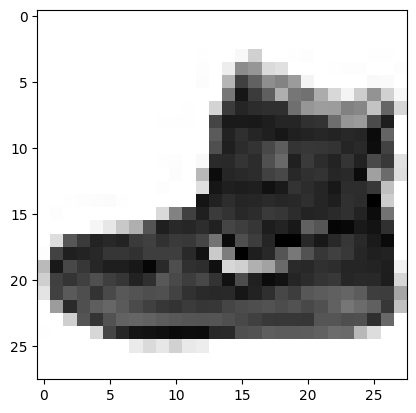

In [14]:
plt.imshow(X_train[0], cmap ="Greys")

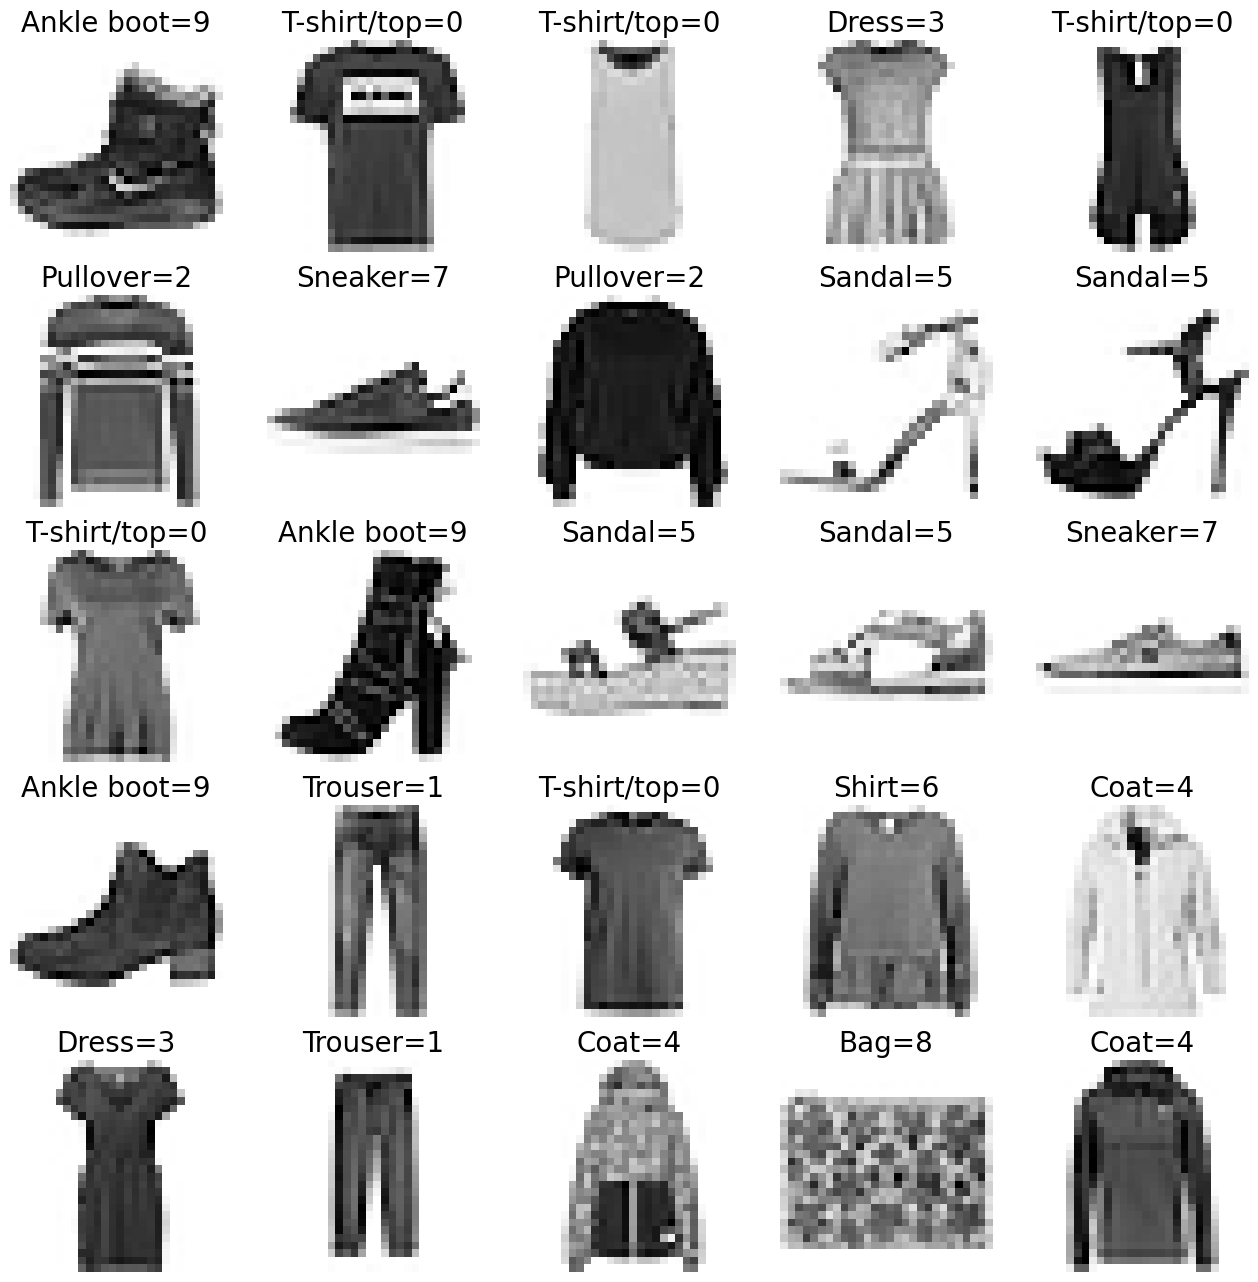

In [15]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

  '''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

Feature Scaling

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Build Neural Network

In [18]:
model = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5369 - accuracy: 0.8124


In [22]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4133 - accuracy: 0.8548
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3774 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3542 - accuracy: 0.8730
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8784
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3268 - accuracy: 0.8804
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8859
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3056 - accuracy: 0.8871
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2974 - accuracy: 0.8909
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2909 - accuracy: 0.8931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.285

## Test And Evaluate Neural Network

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3785 - accuracy: 0.8665


[0.37845736742019653, 0.8665000200271606]

In [24]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [25]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.95],
      dtype=float32)

In [26]:
np.argmax(y_pred[0].round(2))

9

In [27]:
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [28]:
y_test[0]

9

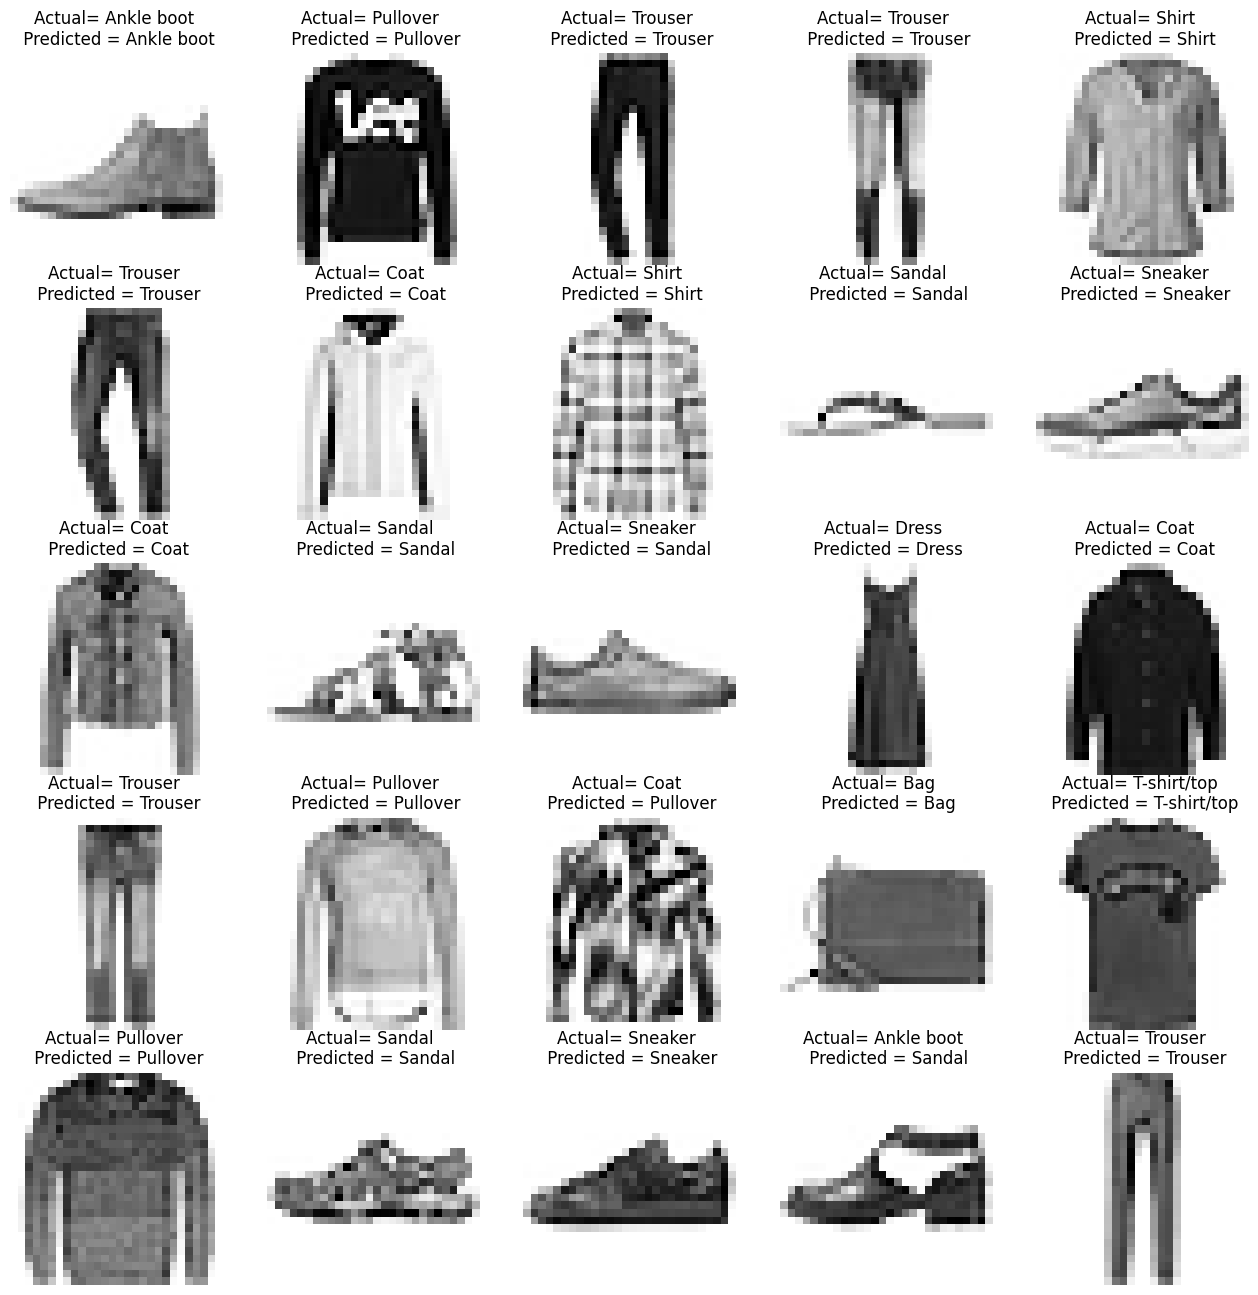

In [29]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

<Axes: >

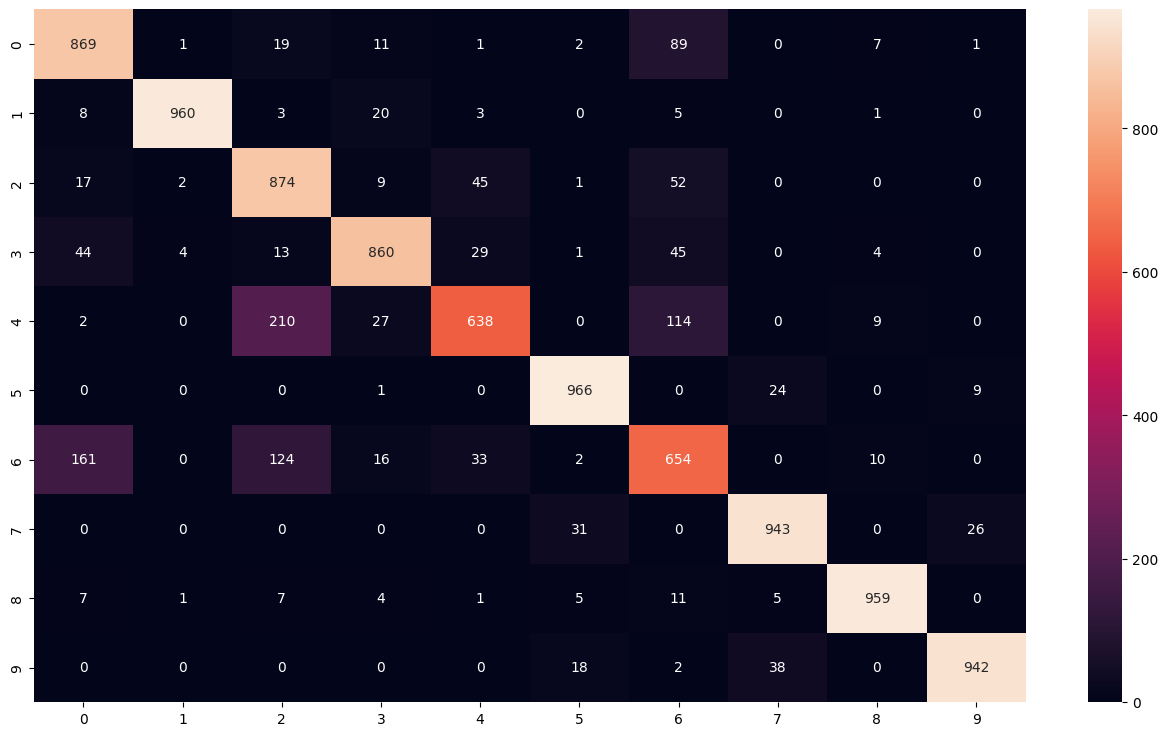

In [31]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

## Classification Report

In [32]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)

In [33]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.87      0.82      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.70      0.87      0.78      1000
       Dress       0.91      0.86      0.88      1000
        Coat       0.85      0.64      0.73      1000
      Sandal       0.94      0.97      0.95      1000
       Shirt       0.67      0.65      0.66      1000
     Sneaker       0.93      0.94      0.94      1000
         Bag       0.97      0.96      0.96      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Save Model

In [34]:
model.save("MNIST_classifier_nn_model.h5")


In [35]:
model = keras.models.load_model("MNIST_classifier_nn_model.h5")

In [36]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[6.5746775e-07, 6.3374237e-08, 2.4691607e-07, ..., 4.3654498e-02,
        3.1132466e-05, 9.4817322e-01],
       [1.2433130e-04, 1.9690178e-11, 9.9956578e-01, ..., 7.5569709e-20,
        1.6129323e-09, 1.9642413e-16],
       [1.7288996e-05, 9.9998218e-01, 3.0330906e-08, ..., 3.0229330e-18,
        1.4407775e-10, 1.1738435e-15],
       ...,
       [4.9675042e-03, 1.1382784e-09, 1.4972538e-03, ..., 9.8211949e-08,
        9.9228704e-01, 1.6004327e-13],
       [4.2556054e-05, 9.9952453e-01, 1.1733989e-06, ..., 1.0487817e-12,
        3.6042067e-08, 6.7626075e-08],
       [2.0393691e-06, 1.1369230e-09, 2.3701830e-06, ..., 1.6681737e-03,
        6.3107070e-04, 7.9339079e-06]], dtype=float32)